# TP 4 : Fillrates

## I. Passive Orders  and Probability of Execution

### 1. Probability of Execution

* Empirically determined with the data
* Compute for different limits (in ticks) and different durations (in seconds or in trades)
* Study the dependence of the execution probability on limit and duration

### 2. Implementation

* Use the two datasets : trades and LOB
* Synchronize both datasets by resampling them for different durations
* Compare the posting price with the trade price to determine if the limit order is executed
* Average on the whole day to estimate the execution probability depending on limit and resampling period. What happens when the duration goes to 0 ? Comment.

## II. Fillrate

### 1. Definition

* Instantaneous volume obtained when present inside the orderbook
* Dependent on order parameters (size, distance, duration, type)
* Also dependant on market factors (volatility, spread, volume, etc)
* Can be estimated by modeling from empirical data.

### 2. Fillrate at Distance

We consider an agent who catches liquidity (at the bid or at the ask) on a market by only posting passive limit orders. Her placement strategy consists in
* posting a limit order of size q at a distance d (in ticks) from the best price ;
* waiting n trades or t seconds or minutes ;
* canceling the current order and replacing the same quantity q at the same distance d for the same duration (n or t).

**a. Buy Order. d=0 (best bid). n=15 trades**

FTE.PA 22/11/2010

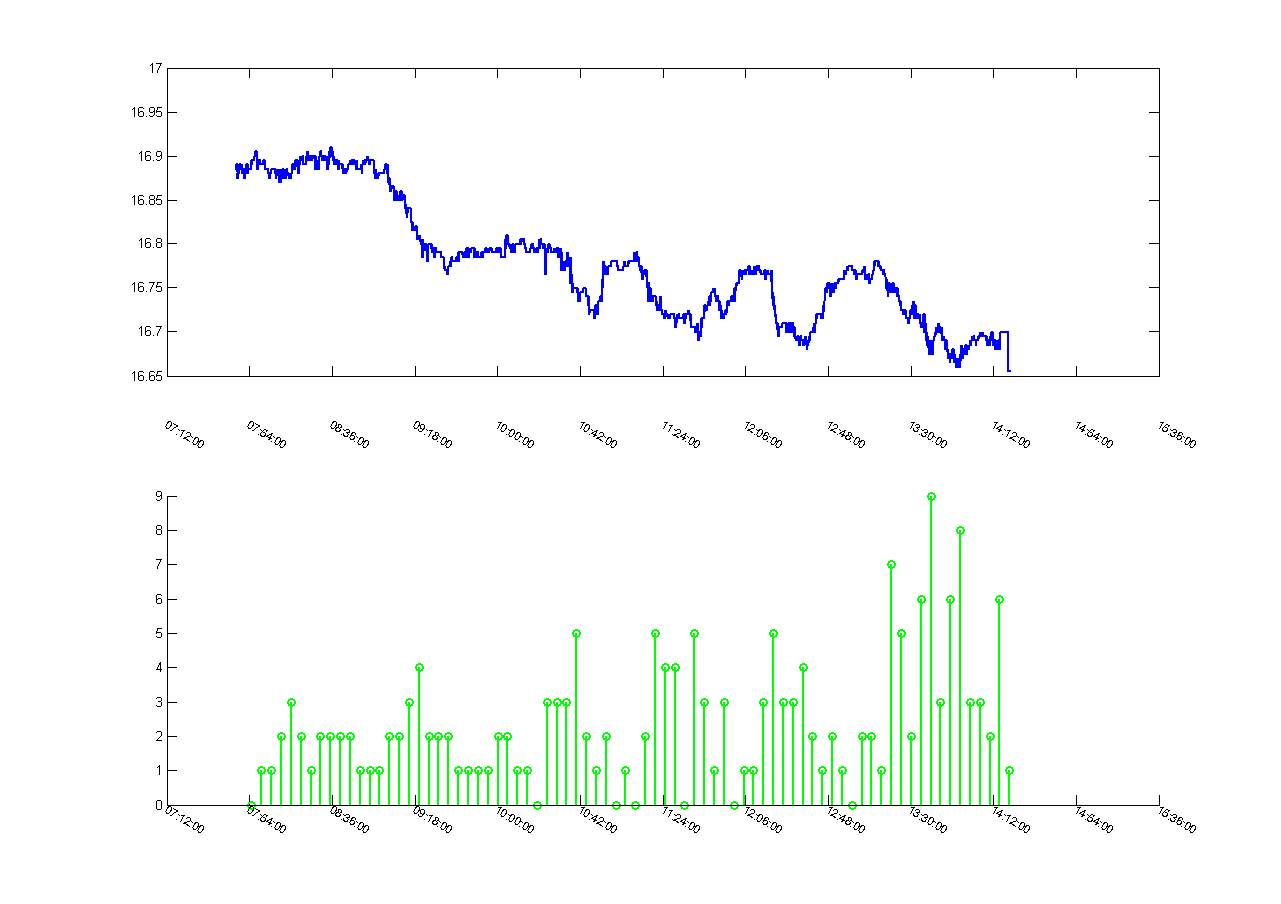

In [4]:
from IPython.display import Image
Image(filename='SingleFillrate.png')

* Order Size = q (1 ATS for example or just 1)
* Fillrate = Executed volume on 15 trades slice
* Strong correlation to market movements – therefore to volatility
* Parameters' sensitivity

**b. Buy Order. d=0 (best bid) vs d=1 (second best bid), n=15 trades**

FTE.PA 22/11/2010

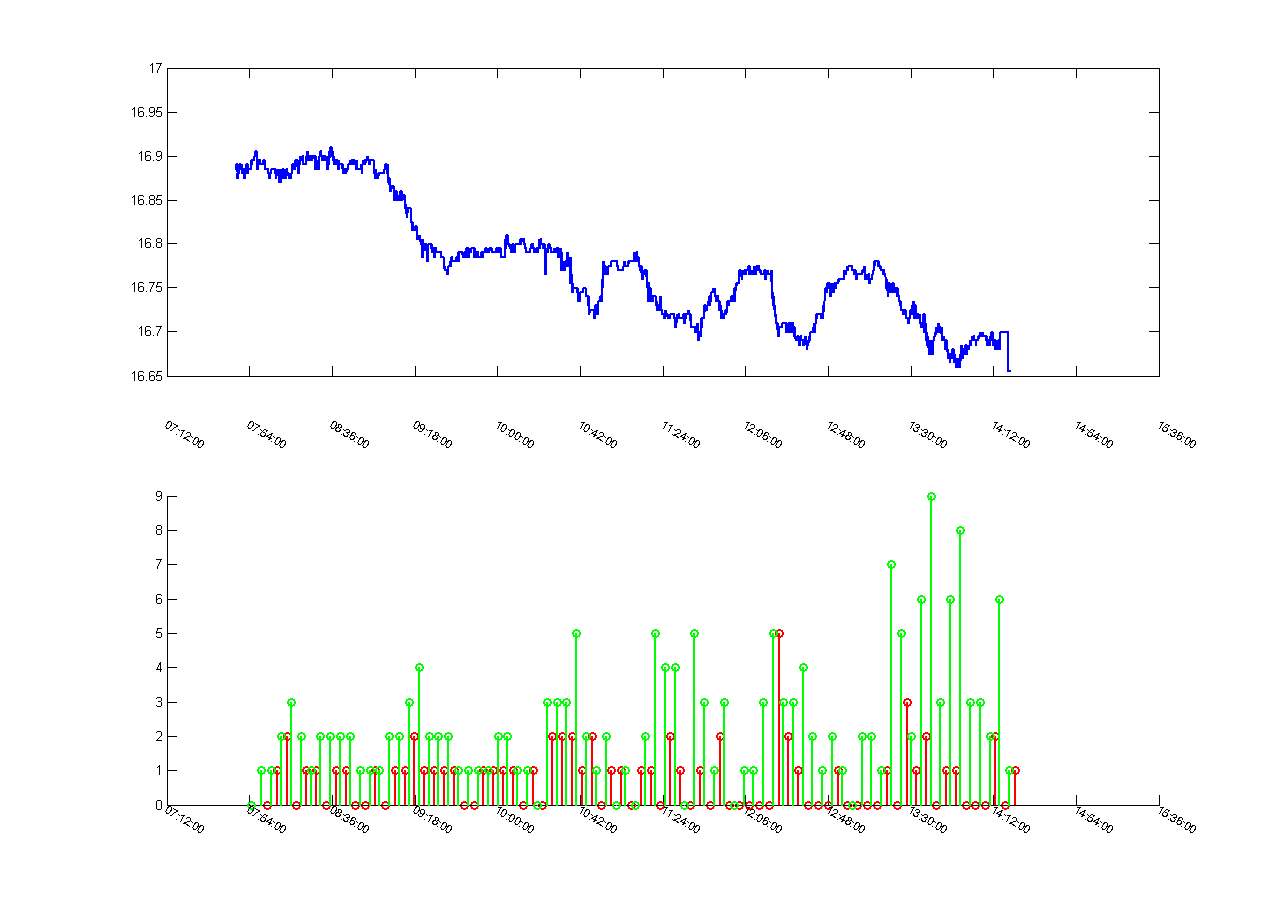

In [5]:
Image(filename='MultipleDFillrate2.png')

_Legend_ : d=0 in green, d=1 in red

**c. Buy Order. n=15 trades vs n=30 trades, d=0 (best bid)**

FTE.PA 22/11/2010

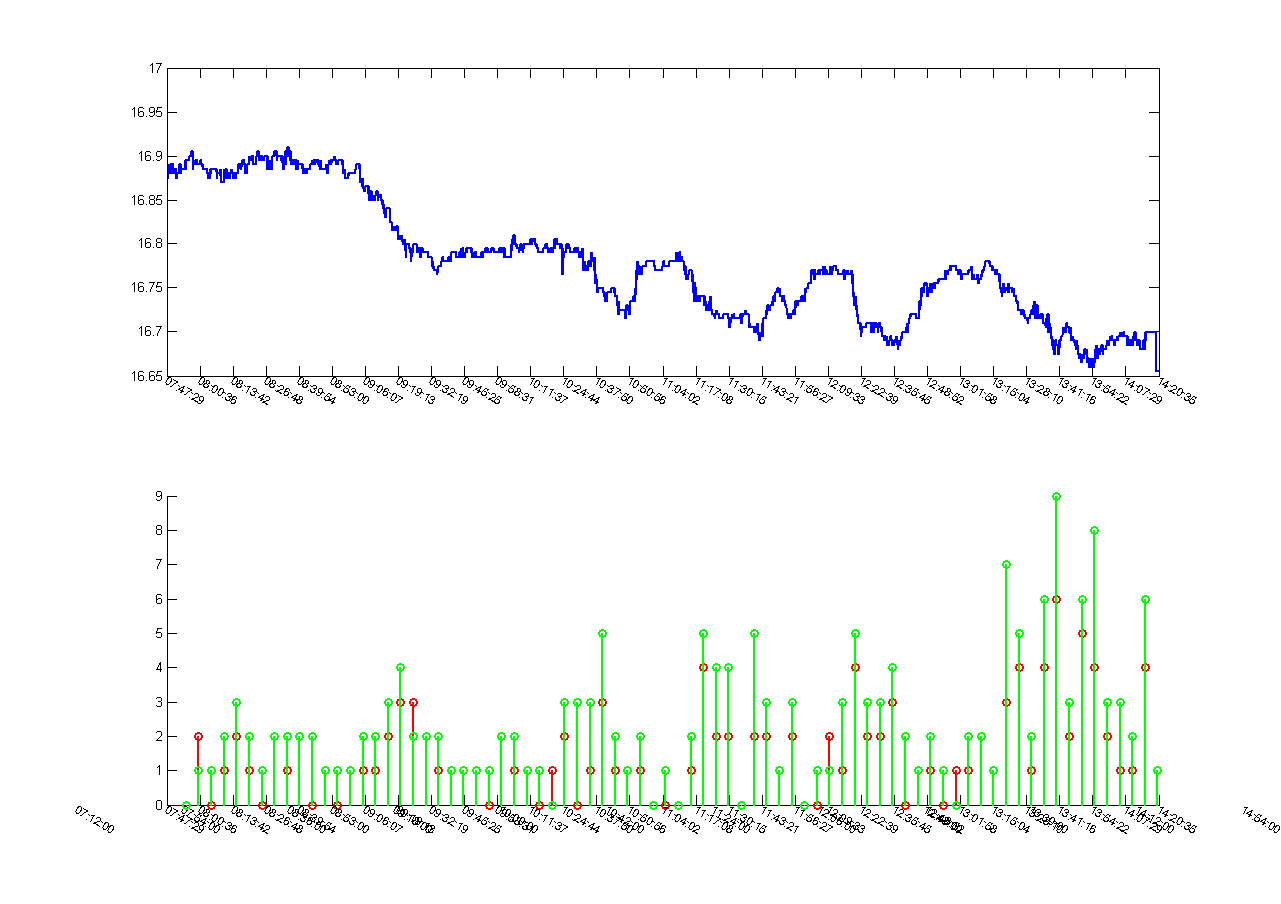

In [6]:
Image(filename='MultipleDtFillrate.png')

_Legend_ : n=15 in green, n=30 in red

**d. Both : d=0 & n=15 vs d=1 & n=30**

FTE.PA 22/11/2010

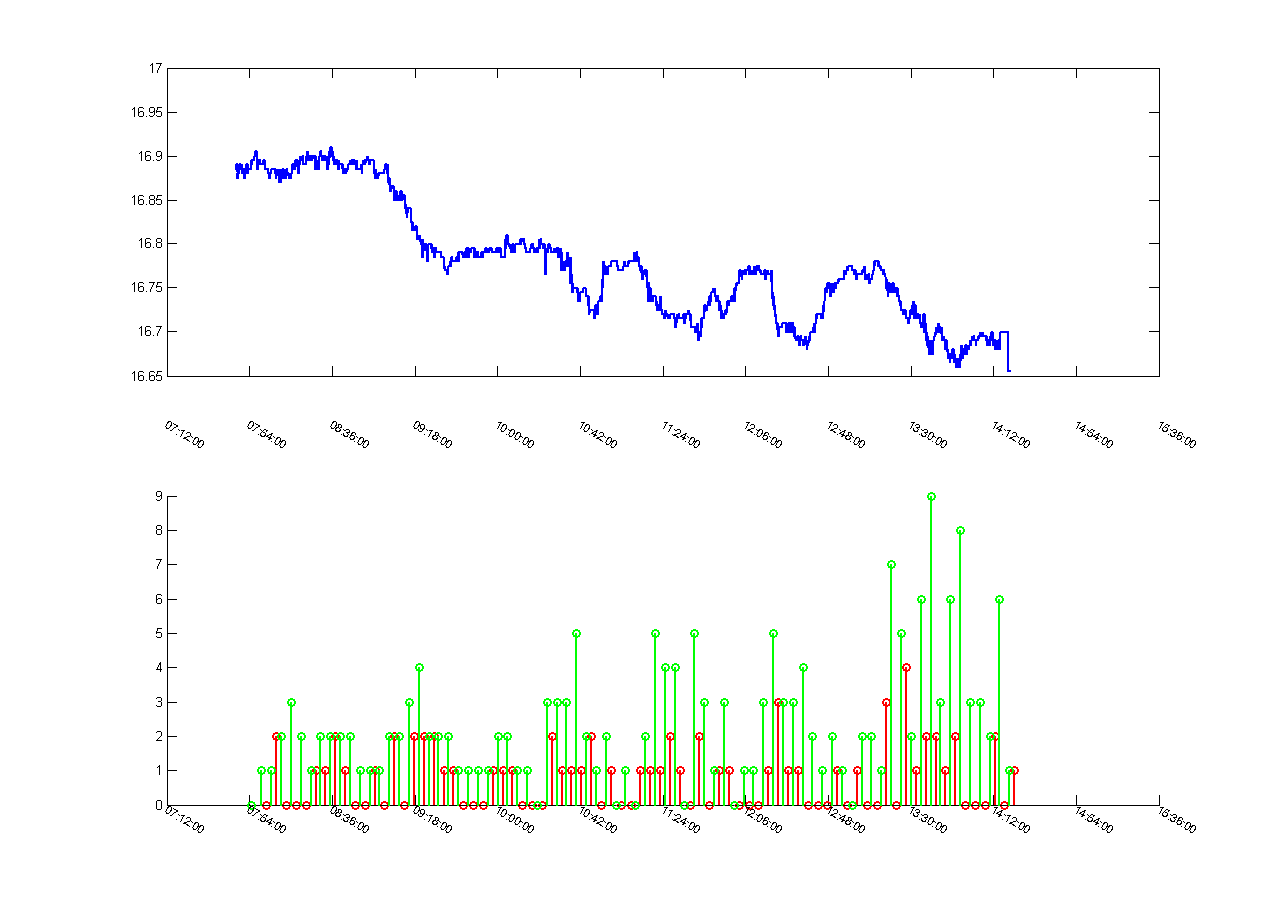

In [7]:
Image(filename='MultipleDFillrate.png')

_Legend_ : d=0 & n=15 in green, d=1 & n=30 in red

### 3. Implementation

a. Plot the price dynamics and the associated fillrate of this posting strategy.

b. Compare with different durations (in seconds/minutes or trades or both).

c. Compare with different distances.

d. Comment.

## III. Inventory and Market Making

### 1. Inventory

* Volume obtained during the day using a liquidity seeking tactic
* Can be regarded as the integral of the fillrate over a period of time
* Thus it is dependant of the same parameters.



** Implementation**

a. Plot the inventory evolution of the previous strategy depending on d and t.

b. Study the dependence of this inventory $V$ on volatility $\sigma$ and spread $S$ (with $\frac{\partial V_t}{\partial \sigma_t}$ and $\frac{\partial V_t}{\partial S_t}$ for example).

c. Comment.

### 2. Static Market Making

We consider now a market-maker using the same strategy as the agent before to buy and sell simultaneously stocks on the same market. We assume that at the beginning of the day the market-maker has an intial inventory $V_0 = 0$ stocks. Let $d_b$ and $d_a$ the posting distances for buying and selling respectively.

#### a. Inventory for $d_b=0$ and $n_b=15$, $d_a=0$ and $n_a=15$

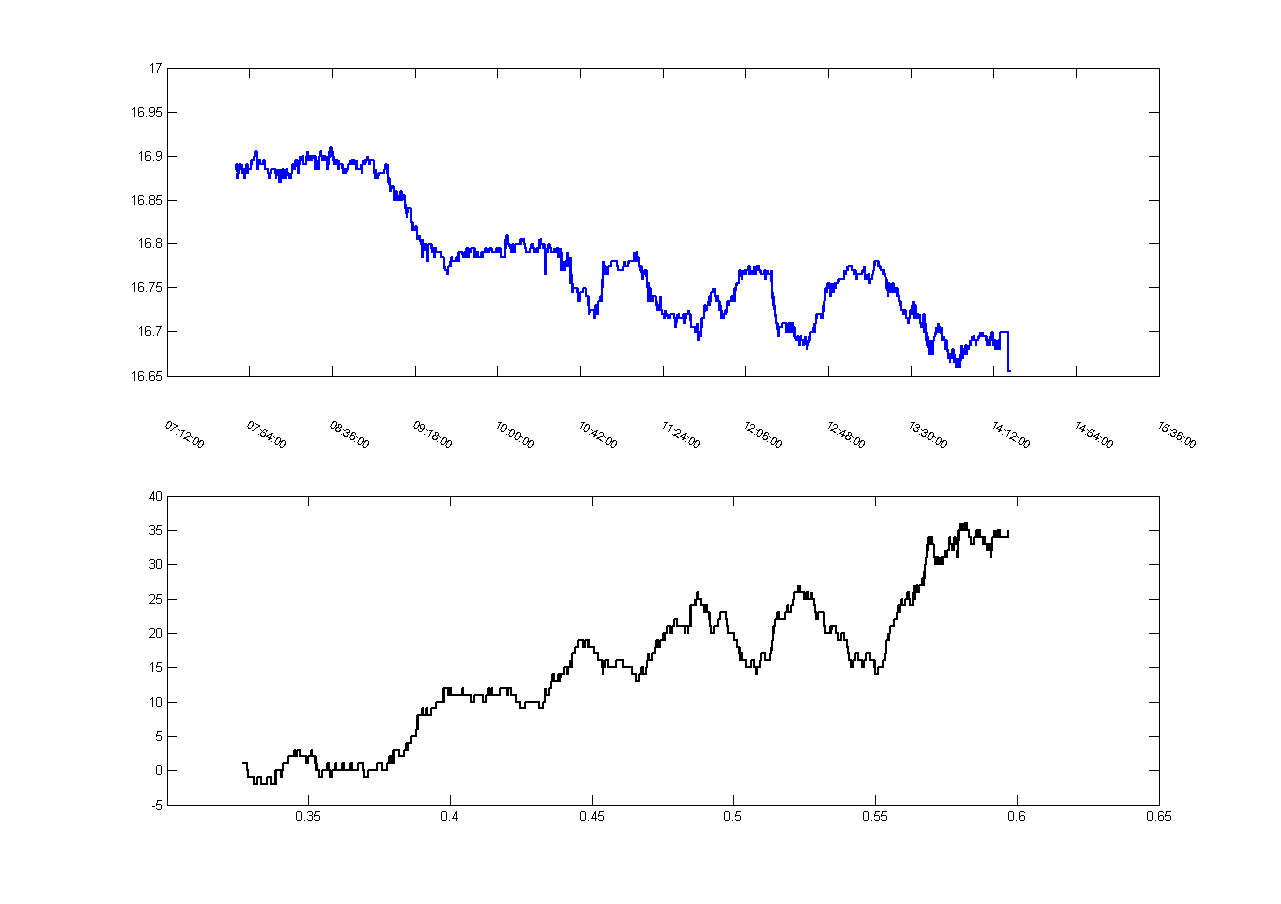

In [5]:
Image(filename='MarketMaking.png')

#### b. Inventory comparison with different posting parameters

* $d_b=0$ and $n_b=15$, $d_a=0$ and $n_a=15$ (black)
* $d_b=1$ and $n_b=15$, $d_a=0$ and $n_b=15$ (gray)

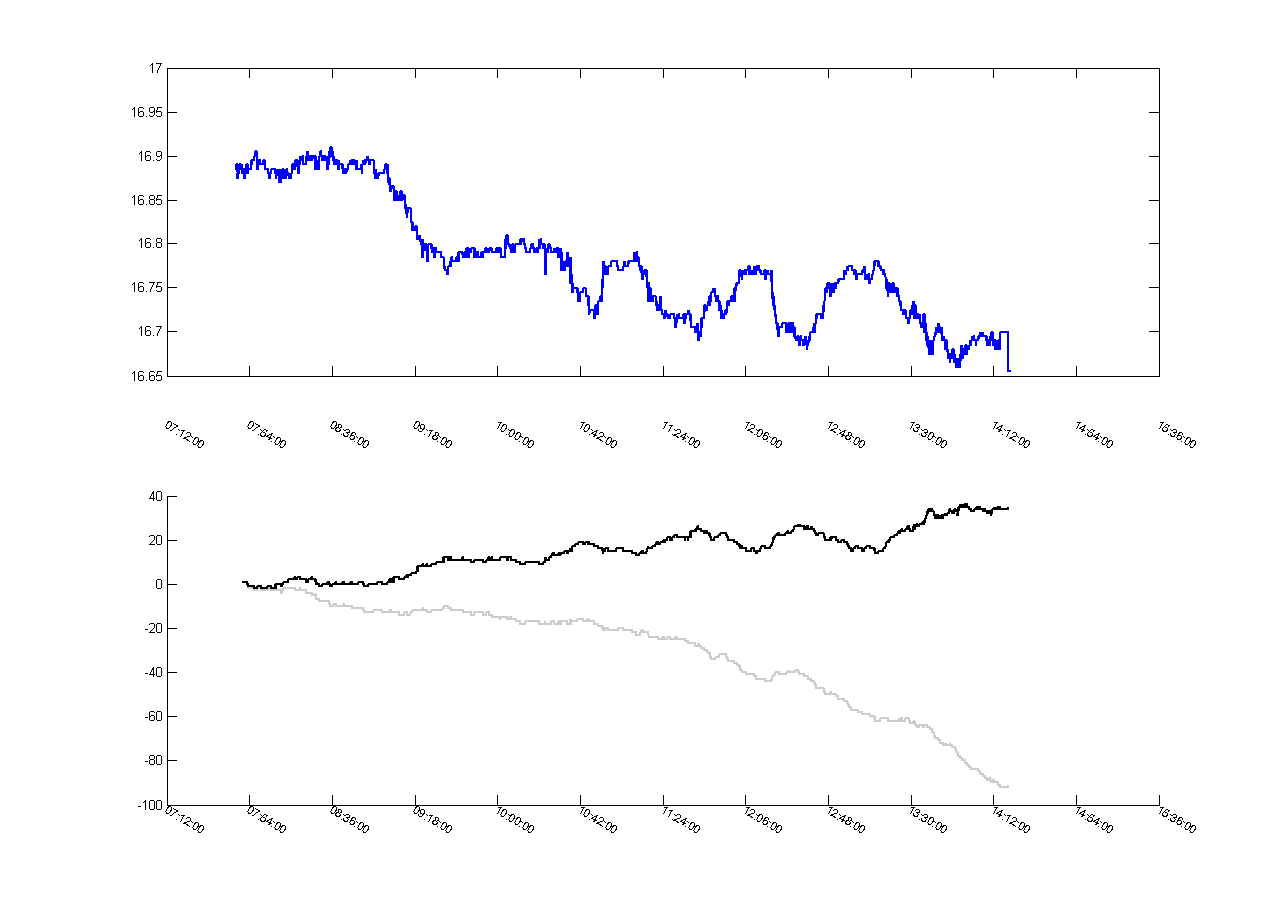

In [5]:
Image(filename='MarketMaking2.png')

** Implementation**

Let fix the duration to $t=$ a few minutes or $n=15$ trades.

a.	Study the inventory evolution regarding $d_b$ and $d_a$. What are the optimal $d_b$ and $d_a$ to have a non-zero stationary inventory ?

b.	Study the sensitivity of the previous answer to the initial inventory $V_0$ (positive or negative).

### 3. Dynamical Market Making

* Realtime reassessments
* Dynamical Inventory
* Use market indicators to compute the posting distance

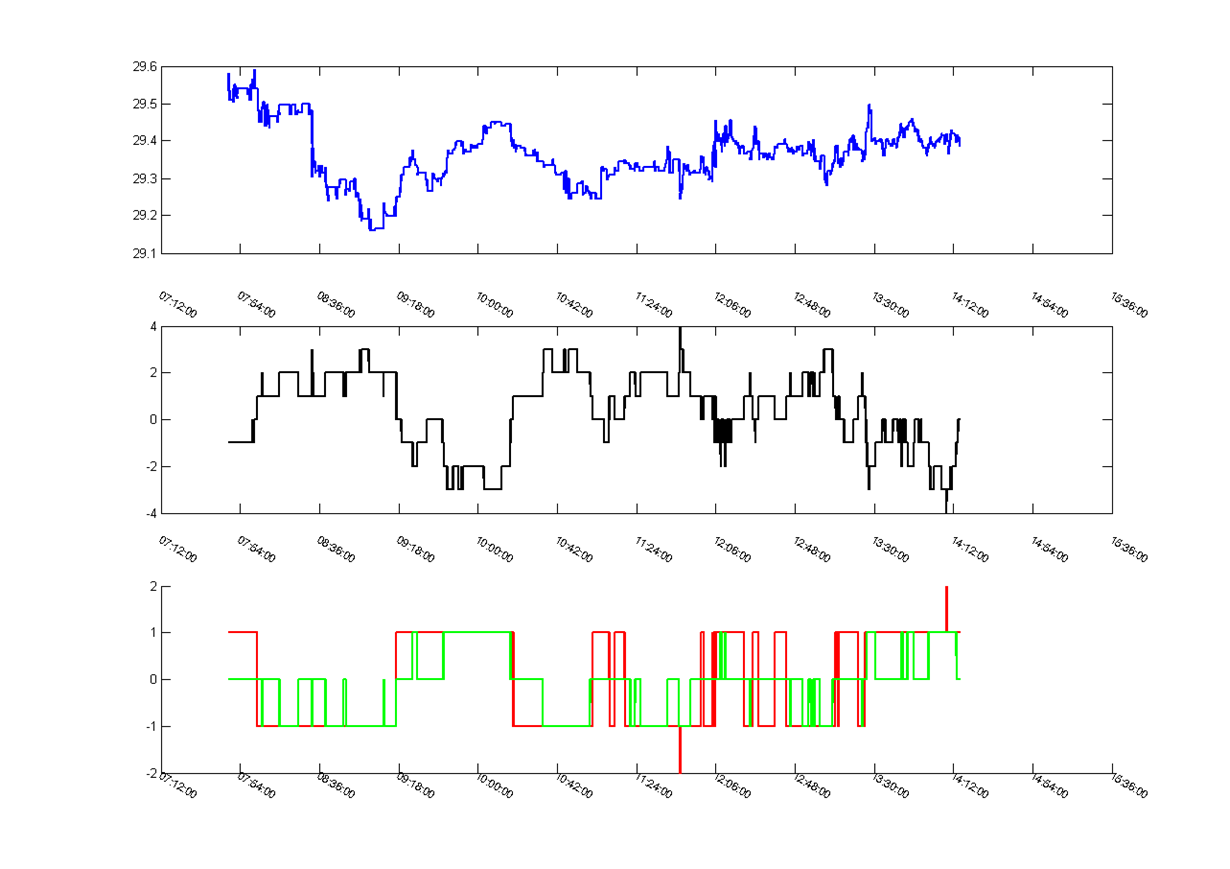

In [7]:
Image(filename='DynamicalMarketMaking.png')

** Implementation** 

Let fix the duration to $t=$ a few minutes or $n=15$ trades.

a. Set the posting distances $d_b$ and $d_a$ as functions of the intraday volatility : $d_{b,t} = c_b\sigma_t$ and $d_{a,t}=c_a\sigma_t$. Determine the optimal constants $c_b$ and $c_a$ to have a non-zero stationary inventory with $V_0=0$. 

b. Plot on the same graph the evolutions of inventory, price and volatility for the optimal values of $c_b$ and $c_a$. Comment.

c. Propose other intraday variables which could be used to optimize the posting price. 


### 4. P&L

** Implementation **

For the same market maker, we consider that the remaining stocks at the end of the day have to be traded at the close (the last price of the day). 

a. Plot and compare the P&L of the optimal strategies obtained in the previous section (for fixed $d_b$ and $d_a$ and as functions of intraday volatility). Add on the graphs the price, the inventory and the volatility. 

b. Do you think that it is always possible to liquidate an inventory at the closing price ?

c. Study the dependence of the P&L to the inventory. If the posting distance depends on both inventory and volatility $d_t=f(V_t,\sigma_t)$, what could be the shape of $f$ to optimize the closing P&L ?